In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Kmeans Clustering**

K-means aims to partition a set of observations into K clusters, each defined by the mean of the points in the cluster. The goal is to minimize the variance within each cluster.

**Algorithm Overview:**

Initialization: Choose K initial cluster centers (centroids). This can be done randomly or by using heuristic methods.

Assignment Step: Assign each data point to the nearest cluster center. Nearest is usually defined in terms of Euclidean distance.

Update Step: Recalculate the centroids as the mean of all points assigned to the cluster.

Iteration: Repeat the assignment and update steps until convergence, which is typically when the assignments no longer change.

**Number of Clusters (K):** The number of clusters K is a user-defined parameter and a critical choice. Techniques like the Elbow method or the Silhouette method can help determine an appropriate value of K.

**Features of K-means:**

Simplicity: It's straightforward and easy to understand and implement.

Scalability: Works well with large datasets.

Applicability: Suitable for a wide range of applications.

**Limitations:**

Sensitivity to Initial Centroids: The final clusters can depend on the initial choice of centroids.

Assumes Spherical Clusters: K-means assumes that clusters are convex and isotropic, which might not always be the case.

Difficulty with Different Sizes and Densities: Struggles with clusters of varying sizes and different densities.

Outliers: Sensitive to outliers, as they can significantly influence the mean.

**Applications:**

Widely used in market segmentation, pattern recognition, image compression, and many other fields.

In [3]:
import pandas as pd

file = '/content/drive/MyDrive/Data_Mining_CMPE_255/Mall_Customers.csv'
data = pd.read_csv(file)

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The data has

CustomerID: Unique Identification ID

Gender

Age

AnnuakIncome in 1000 dollars

Spending Score in the range 1-100

Lets try finding the relation/pattern between Annual Income and Spending Score using Kmeans Clustering  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

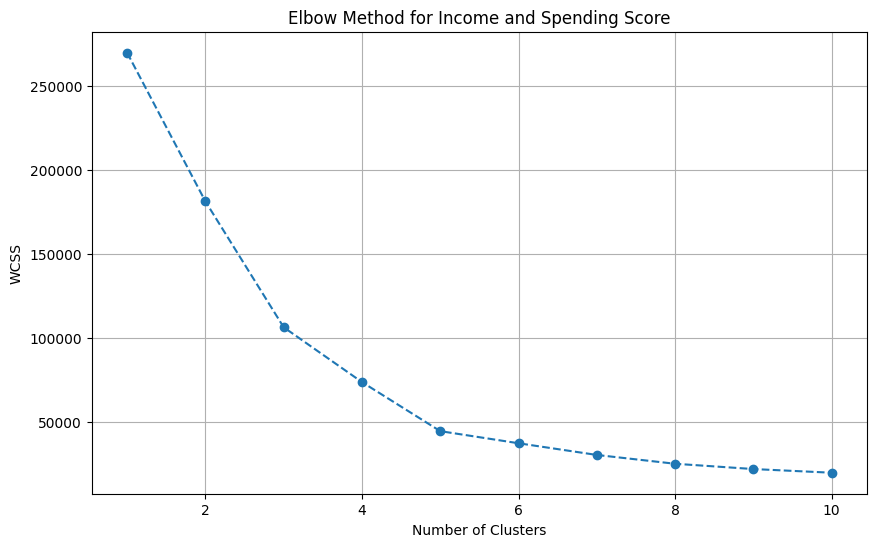

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extracting the 'Annual Income (k$)' and 'Spending Score (1-100)' columns
income_spending_data = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Performing K-means clustering using the Elbow method to determine the optimal number of clusters
wcss_income_spending = []
for i in range(1, 11):
    kmeans_income_spending = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_income_spending.fit(income_spending_data)
    wcss_income_spending.append(kmeans_income_spending.inertia_)

# Plotting the Elbow Chart for 'Annual Income' and 'Spending Score'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_income_spending, marker='o', linestyle='--')
plt.title('Elbow Chart for Income and Spending Score')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

The "elbow" point, where the rate of decrease sharply changes, indicates the optimal number of clusters. In this chart, that point seems to be around 5 clusters.

Lets Plot Voronoi Tessellation to determine clusters and how they've learnt

 A Voronoi Tessellation of a plane with a set of seed points divides the plane into regions. Each region corresponds to one seed point and contains all points closer to that seed point than to any other.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

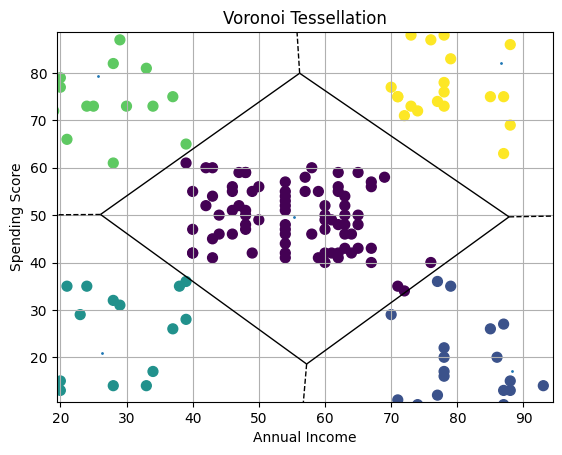

In [6]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# Performing K-means clustering with the optimal number of clusters
optimal_clusters = 5
kmeans_final = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters_final = kmeans_final.fit_predict(income_spending_data)

# Plotting the Voronoi Tessellation for 'Annual Income' and 'Spending Score'
vor_final = Voronoi(kmeans_final.cluster_centers_)

plt.figure(figsize=(10, 6))
voronoi_plot_2d(vor_final, show_vertices=False, point_size=2)
plt.scatter(income_spending_data.iloc[:, 0], income_spending_data.iloc[:, 1], c=clusters_final, s=50, cmap='viridis')

plt.title('Voronoi Tessellation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

**Mall Customers can be split into 5 Categories**

Low Income High Spending

Low Income Low Spending

Average Income Average Spending

High Income Low Spending

High Income High Spending